In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\prepared_df.csv')

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB
None


In [7]:
# Check for missing values
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


CHECKING FOR MULTI-COLLINEARITY

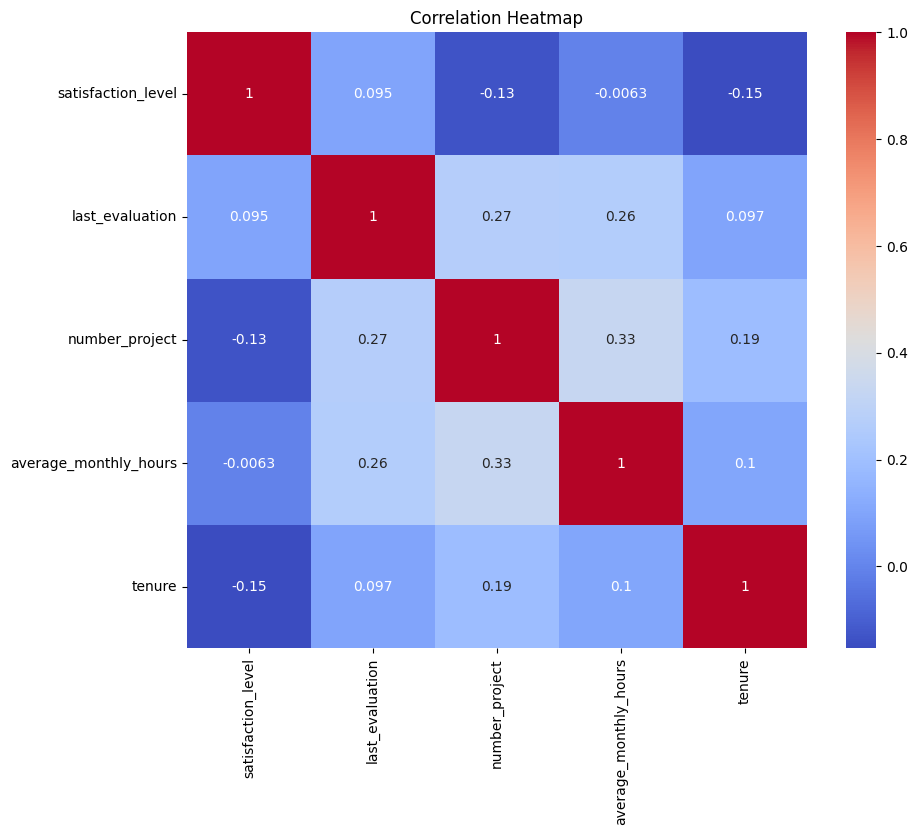

In [8]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 
                      'average_monthly_hours', 'tenure']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

DISTRIBUTION ANALYSIS

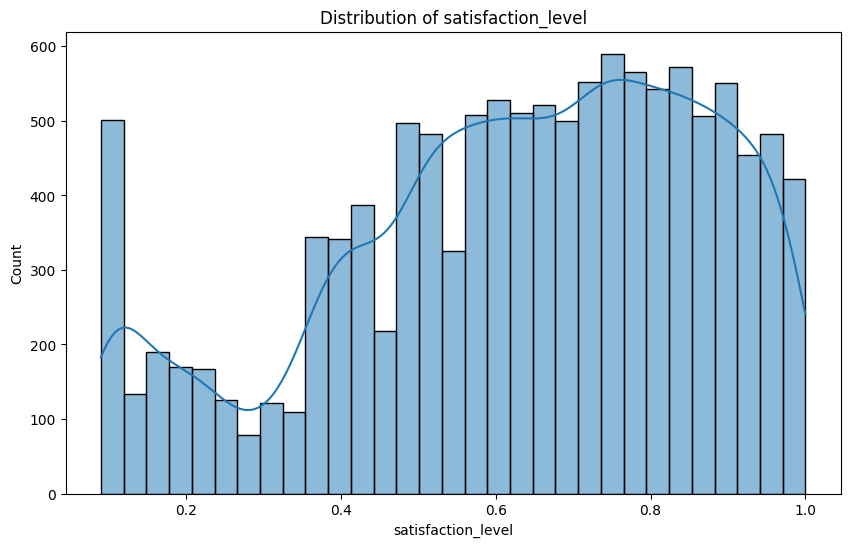

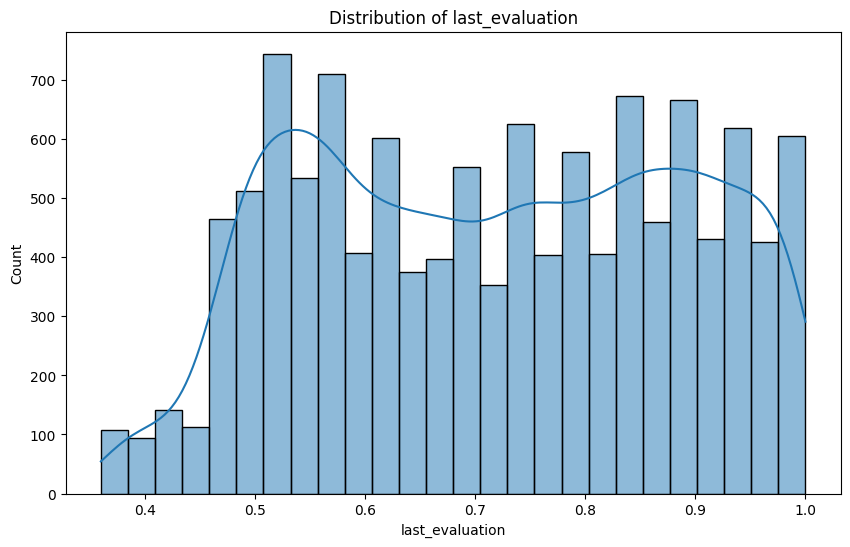

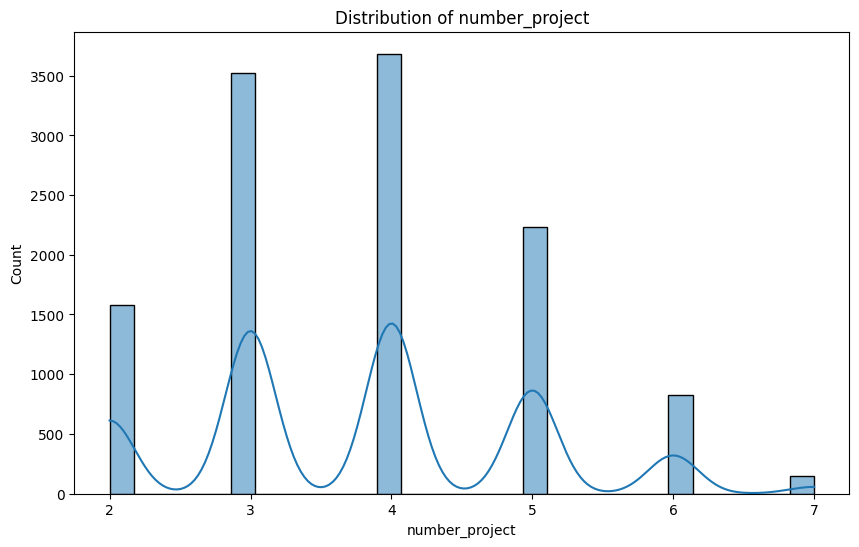

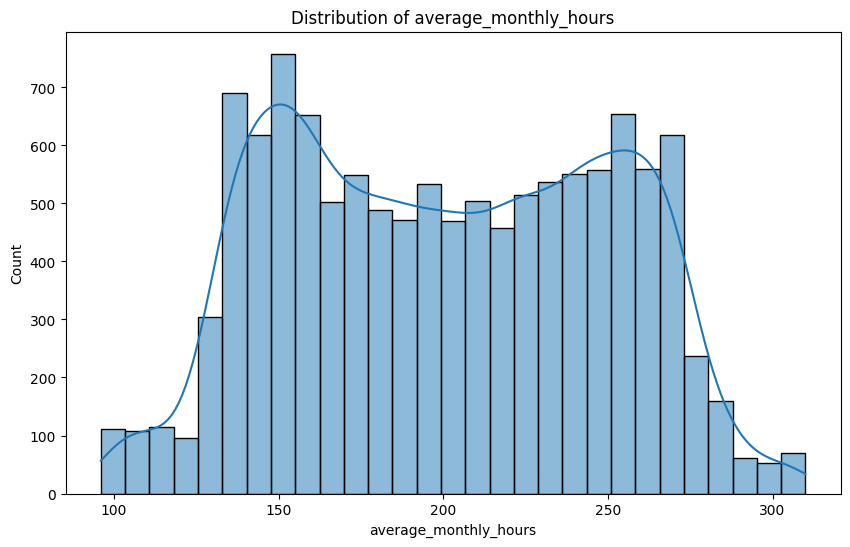

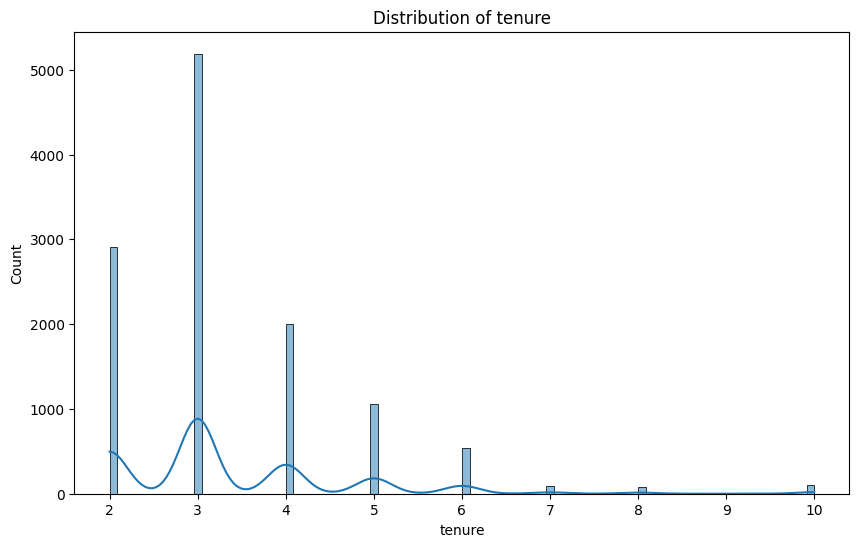

In [9]:
#distribution analysis for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

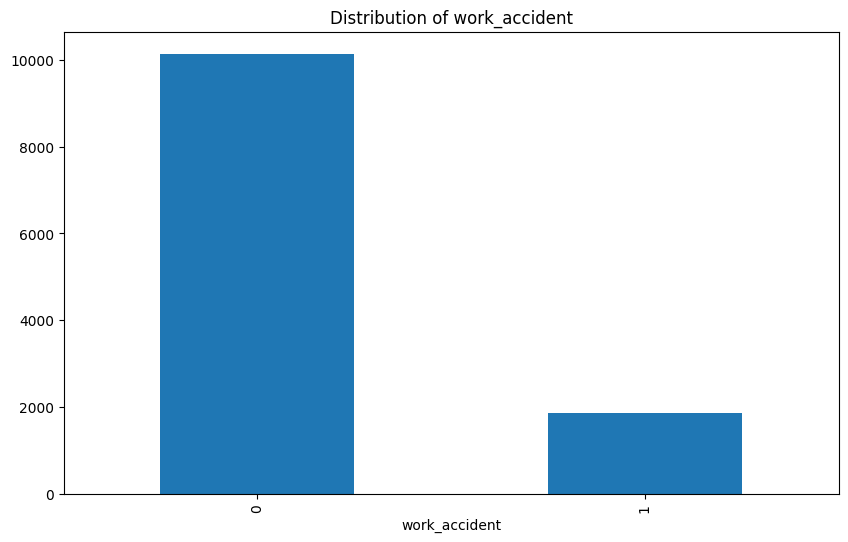

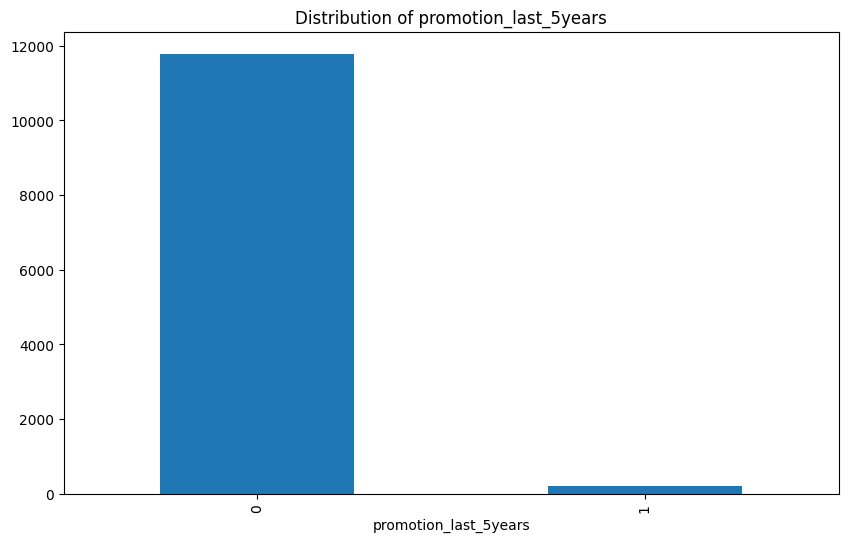

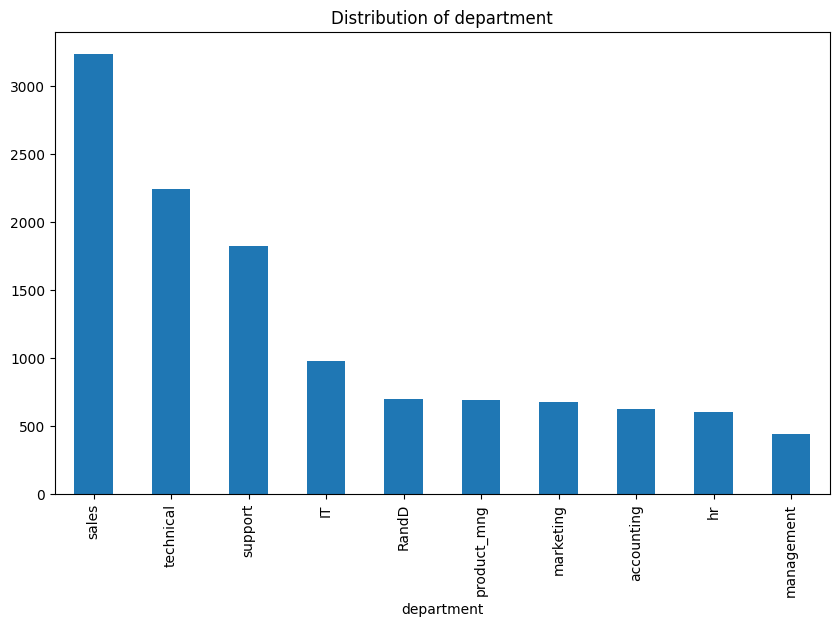

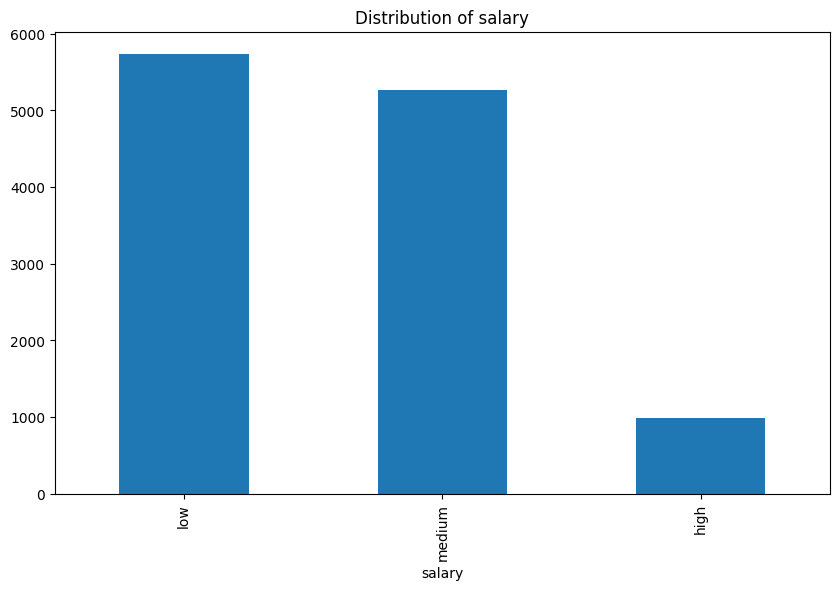

In [10]:
#distribution analysis for categorical features
categorical_features = ['work_accident', 'promotion_last_5years', 'department', 'salary']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.show()


DATA VISUALIZATION

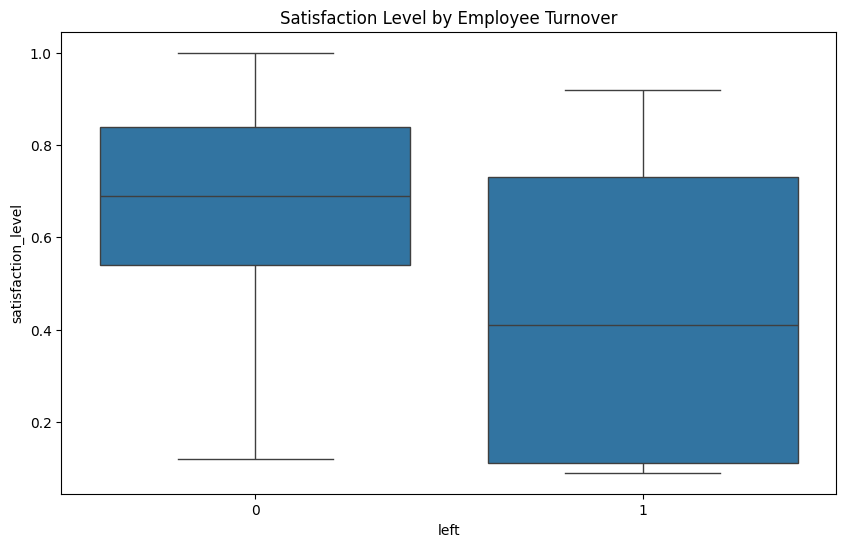

In [11]:
# Boxplot of satisfaction_level by left
plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level by Employee Turnover')
plt.show()



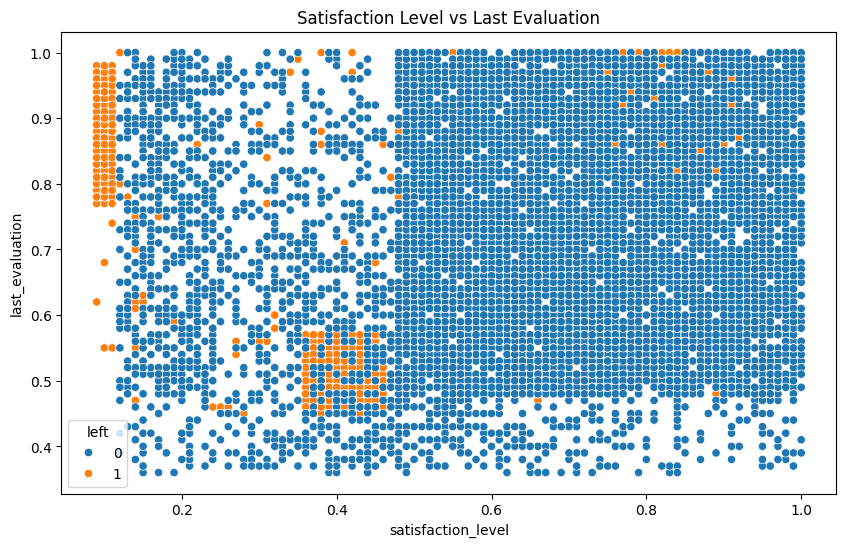

In [12]:

# Scatter plot of satisfaction_level vs last_evaluation, colored by left
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='left', data=df)
plt.title('Satisfaction Level vs Last Evaluation')
plt.show()



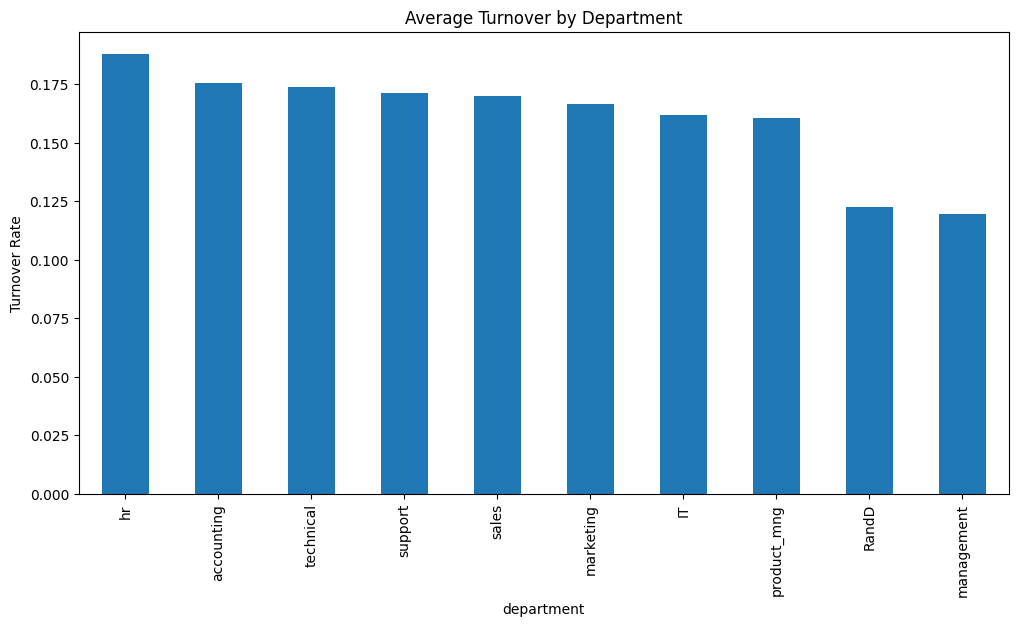

In [13]:

# Barplot of average turnover by department
dept_turnover = df.groupby('department')['left'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
dept_turnover.plot(kind='bar')
plt.title('Average Turnover by Department')
plt.ylabel('Turnover Rate')
plt.show()

MODEL TRAINING AND EVALUATION

In [14]:
# Prepare the data
X = df.drop('left', axis=1)
y = df['left']


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Define features
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project', 
                    'average_monthly_hours', 'tenure']
categorical_features = ['work_accident', 'promotion_last_5years', 'department', 'salary']


In [17]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

In [18]:
def train_predict_evaluate(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    
    return y_pred

In [19]:
models = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    SVC(random_state=42)
]

predictions = {}

for model in models:
    model_name = model.__class__.__name__
    predictions[model_name] = train_predict_evaluate(model, X_train, X_test, y_train, y_test)

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.50      0.18      0.26       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.58      2399
weighted avg       0.80      0.83      0.80      2399


Confusion Matrix:
[[1928   70]
 [ 330   71]]


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1998
           1       0.85      0.89      0.87       401

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.96      0.95      0.96      2399


Confusion Matrix:
[[1933   65]
 [  43  358]]


Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      19

compare the performance of different models, by looking at their accuracy scores:

In [20]:
from sklearn.metrics import accuracy_score

for model_name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

LogisticRegression Accuracy: 0.8333
KNeighborsClassifier Accuracy: 0.9550
DecisionTreeClassifier Accuracy: 0.9646
GaussianNB Accuracy: 0.8345
SVC Accuracy: 0.9679


In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier


In [22]:
# Define ensemble models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42)


In [23]:
# Stacking
stacking = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('dt', dt)],
    final_estimator=lr,
    cv=5
)

# Voting
voting = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('dt', dt), ('lr', lr)],
    voting='soft'
)

In [24]:
# Train and evaluate models
models = {
    'Random Forest (Bagging)': rf,
    'Gradient Boosting': gb,
    
}

results = {}

for name, model in models.items():
    results[name] = train_predict_evaluate(model, X_train, X_test, y_train, y_test)


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399


Confusion Matrix:
[[1989    9]
 [  43  358]]


Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.96      0.91      0.93       401

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


Confusion Matrix:
[[1984   14]
 [  37  364]]




In [25]:
models = {
    
    'Stacking': stacking,
    'Voting': voting
}

results = {}

for name, model in models.items():
    results[name] = train_predict_evaluate(model, X_train, X_test, y_train, y_test)


Classification Report for StackingClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.91      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399


Confusion Matrix:
[[1988   10]
 [  38  363]]


Classification Report for VotingClassifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.97      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399


Confusion Matrix:
[[1987   11]
 [  42  359]]




In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


In [34]:
def train_predict_evaluate(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    
    return {
        'accuracy': accuracy,
        'report': report,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'avg_precision': avg_precision
    }

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

stacking = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('dt', dt)],
    final_estimator=lr,
    cv=5
)

voting = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('dt', dt), ('lr', lr)],
    voting='soft'
)

models = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Stacking': stacking,
    'Voting': voting
}

results = {}

In [36]:
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    results[name] = train_predict_evaluate(model, X_train, X_test, y_train, y_test)
    print(f"Completed {name}")


Training and evaluating Random Forest...
Completed Random Forest
Training and evaluating Gradient Boosting...
Completed Gradient Boosting
Training and evaluating Stacking...
Completed Stacking
Training and evaluating Voting...
Completed Voting


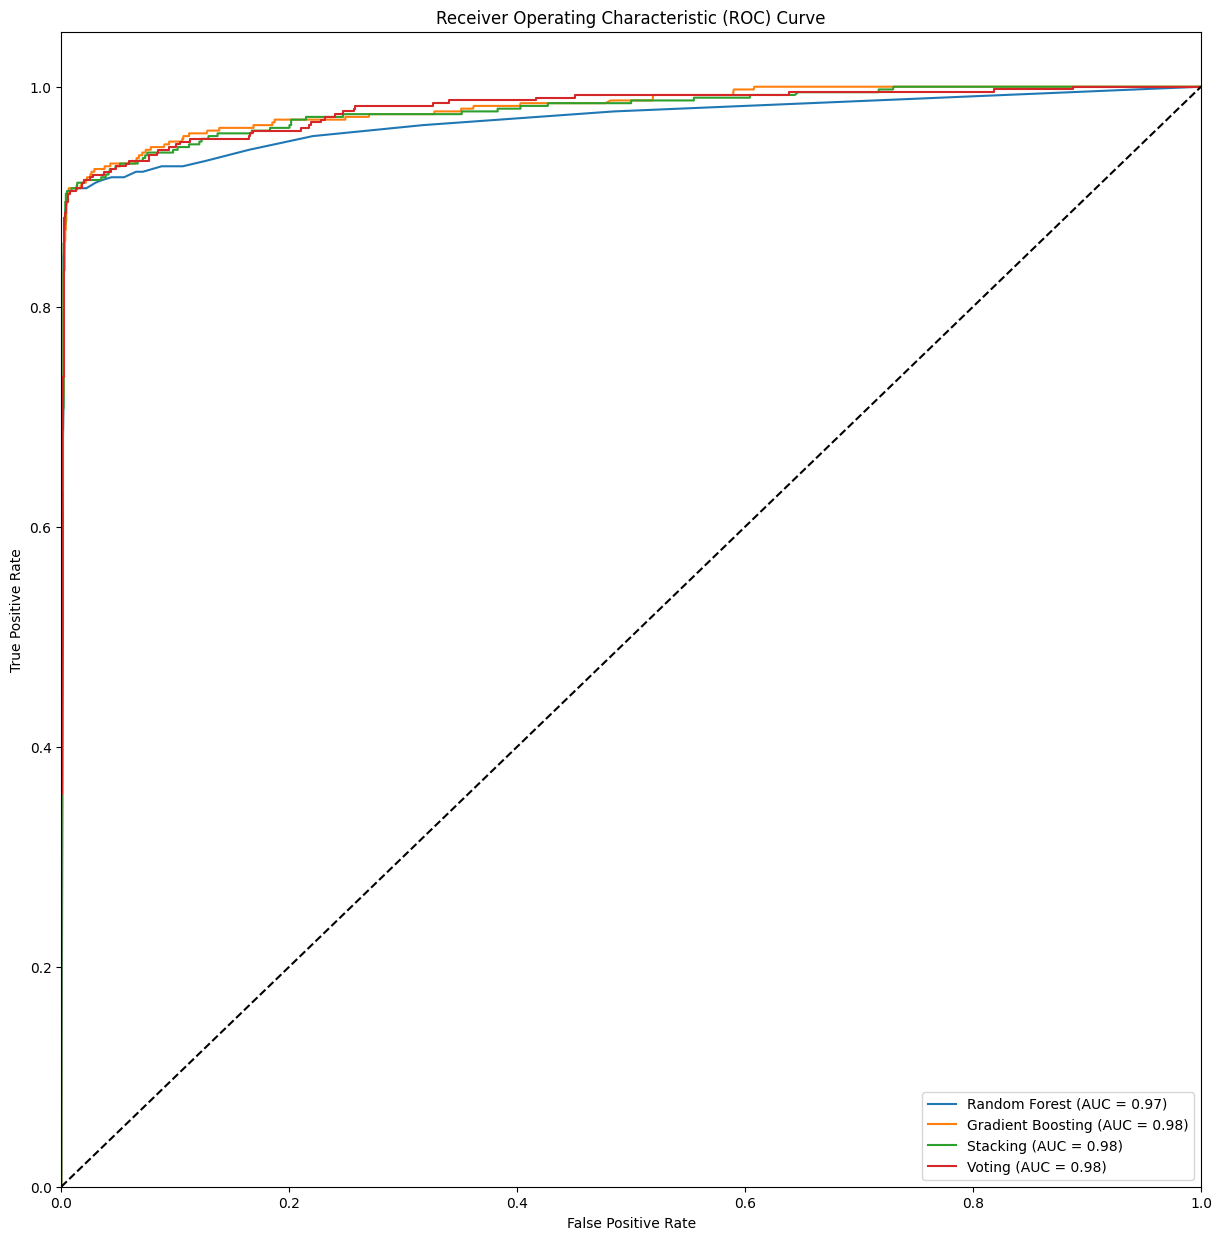

In [41]:
# Plotting
plt.figure(figsize=(50, 15))

# ROC Curve
plt.subplot(131)
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

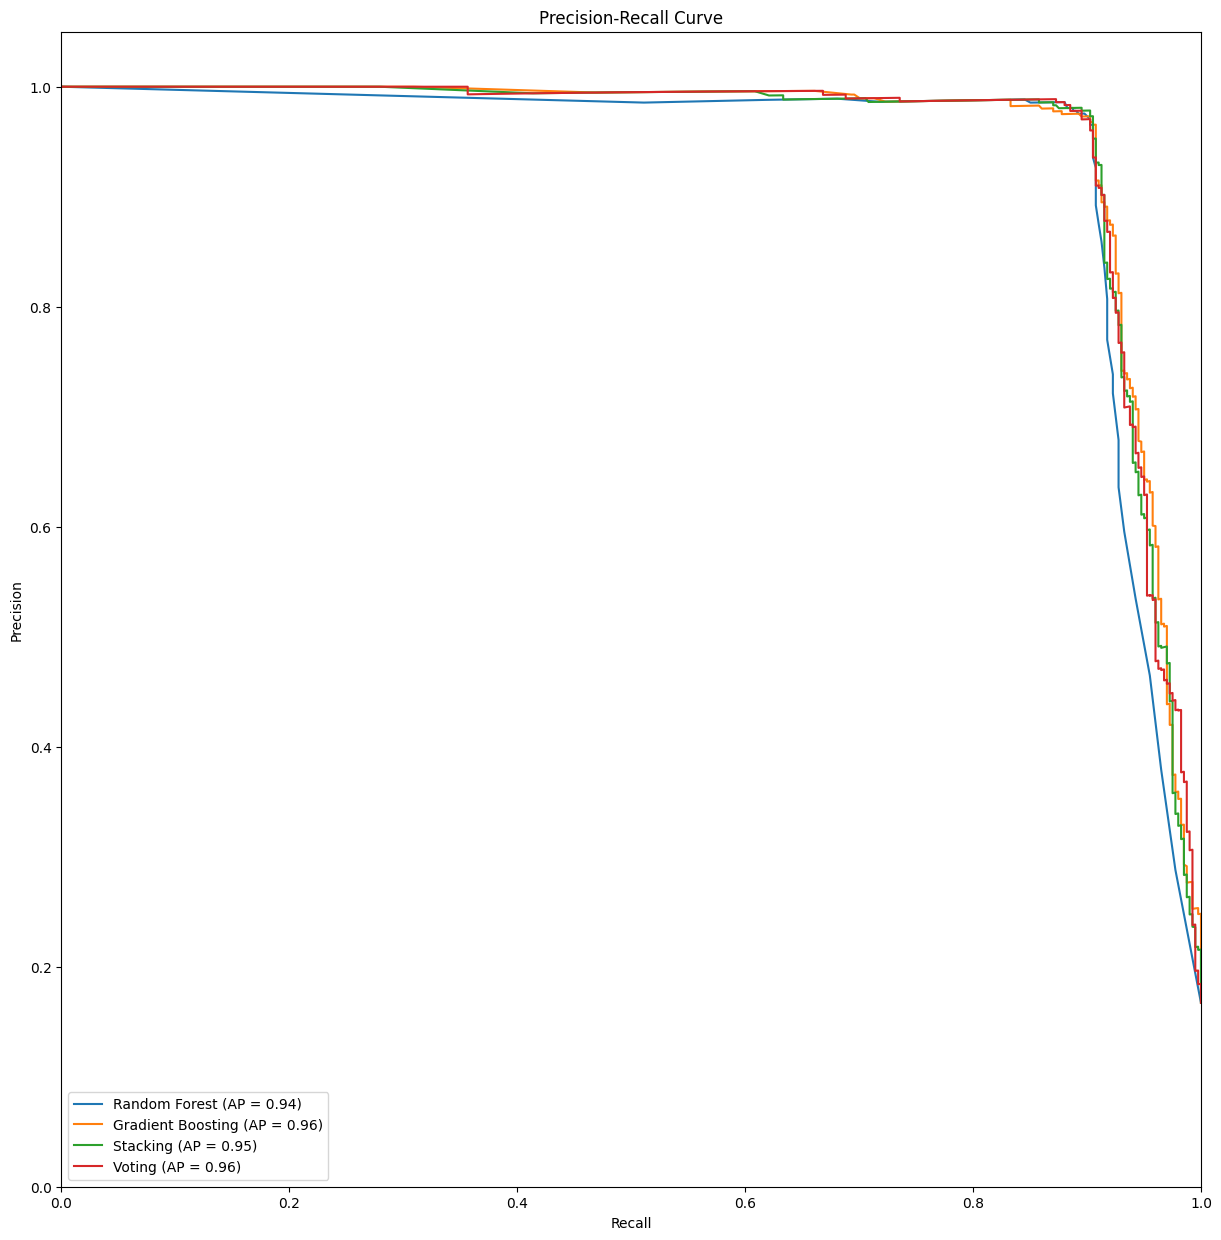

In [43]:
# Precision-Recall Curve
plt.figure(figsize=(50, 15))

plt.subplot(132)
for name, result in results.items():
    plt.plot(result['recall'], result['precision'], label=f'{name} (AP = {result["avg_precision"]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")